<center> <h2>The University of British Columbia</h2> </center>
<center> <h2>Earth and Ocean Sciences 354</h2> </center>
<center> <h3>Geophysical Time Series Analysis</h3> </center>
<center> <h3>Problem Set # 10</h3> </center>

*Due: November 23, 2020*

Learning Goals:
* Find the least squares fit of given data
* Manipulate matrices and arrays in Python

1. Using Python, perform a least squares fit of a quadratic $y = ax^2 + bx + c$ to the following data: $(0,0.1); (1,1.2); (2,2.7); (3,6.9); (4,15.0)$. Provide a plot of the data overlain by a continuous line $y(x)$ indicating your least squares fitting. You can use `np.matmul` to perform matrix multiplication, `np.linalg.inv` to take the inverse of a matrix, and `np.transpose` to take the transpose of an array.  
Use the following approach:  
i) On paper, form the equations of the condition matrix $\textbf{A}$ (a $5 \times 3$ matrix).  
ii) In Python, form the normal equations matrix $\textbf{A}^\top\textbf{A}$.  
iii) Form the vector $\textbf{A}^\top\textbf{y}$.  
iv) Obtain the least squares solution $\textbf{m} = (\textbf{A}^\top\textbf{A})^{-1}\textbf{A}^\top\textbf{y}$.  
v) Plot the quadratic $y(x)$ as a continuous line and the data on a $y$ versus $x$ plot.

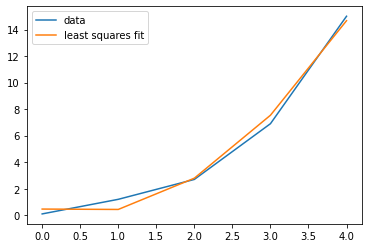

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### QUESTION 1

x_data = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_data = np.array([0.1, 1.2, 2.7, 6.9, 15.0])

plt.plot(x_data, y_data)

# i
A = [[0, 0, 1],[1, 1, 1],[4, 2, 1],[9, 3, 1],[16, 4, 1]]

# ii
normalEquationsMatrix = np.matmul(np.transpose(A), A)

# iii
ATy = np.matmul(np.transpose(A), y_data)

# iv
m = np.matmul(np.linalg.inv(normalEquationsMatrix), ATy)

# v
plt.plot(x_data, m[0]*np.multiply(x_data, x_data) + m[1]*x_data + m[2])
plt.legend(["data", "least squares fit"])
plt.show()

2. Fit a straight line $y = ax + b$ through the 3 data points $(-1,0.1); (0,1.0); (1,1.9)$ by least squares using the following approach. Do your calculations by hand.  
a) Write down the coefficients of the equations of the condition matrix $\textbf{A}$.  
b) Evaluate the normal equations matrix $\textbf{A}^\top\textbf{A}$  
c) Evaluate $\textbf{A}^\top\textbf{d}$.  
d) Write down the normal equations and solve for the model vector $(a,b)$. Verify that, in
this case, the least squares solution is the exact solution.  
e) Change the last point to $(1.0,1.8)$ and recalculate the best-fitting straight line. Plot your points and the straight line on paper (using Python if you like).

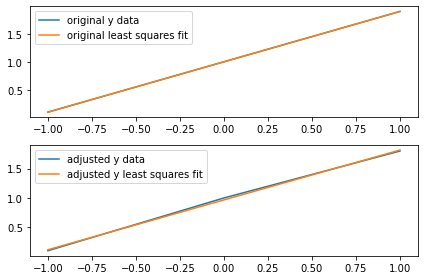

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### QUESTION 2

x_data_2 = np.array([-1, 0, 1])
og_y_data_2 = [0.1, 1.0, 1.9]
y_data_2 = [0.1, 1.0, 1.8]

fig, plots = plt.subplots(2)

plots[0].plot(x_data_2, og_y_data_2)
plots[0].plot(x_data_2, 0.9*x_data_2 + 1.0) #original fit
plots[1].plot(x_data_2, y_data_2)
plots[1].plot(x_data_2, 0.85*x_data_2 + (2.9/3)) #least squares fit with adjusted y
plots[0].legend(["original y data", "original least squares fit"])
plots[1].legend(["adjusted y data", "adjusted y least squares fit"])
plt.tight_layout()
plt.show()


3.  
a) Find the eigenvalues and normalized eigenvectors of the matrix
$$
A = 
\begin{pmatrix}
5 & 0 & \sqrt{3}\\
0 & 1 & 0\\
\sqrt{3} & 0 & 3
\end{pmatrix}
$$
b) Verify the eigenvectors are orthogonal by taking scalar products.  
c) Form the matrix $\mathbf{V}$ from the eigenvectors and show it is orthogonal.  
d) Verify that $\mathbf{V}^\top\mathbf{A}\mathbf{V}$ is diagonal with eigenvalues along the diagonal.  
e) Sketch the quadratic form $\mathbf{x}^\top\mathbf{A}\mathbf{x}$, indicating its principal axes of symmetry.  
(Problem 6.2 on page 117 pf TSAITG).

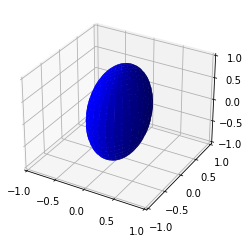

In [3]:
### QUESTION 3 E

# I took code from:
# https://stackoverflow.com/questions/7819498/plotting-ellipsoid-with-matplotlib
# and changed the coefficients to the eigenvalues from the question

fig2 = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig2.add_subplot(111, projection='3d')

coefs = (6, 2, 1)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

4. A pair of random variables $X$, $Y$ are sampled three times to give the values $(1.2, 3.7); (1.5, 5.2);$ and $(1.6, 5.8)$.  
a) Estimate the means and standard deviations of $X$ and $Y$.  
b) Estimate the elements of the covariance matrix $\mathbf{C}=\mathcal{C}[X,Y]$.  
c) Estimate $\mathcal{V}[X+Y]$ directly from the 3 measurements of $X+Y$.  
d) Compare this estimate with the variance obtained from $\mathcal{V}[X]+2\mathcal{C}[X,Y]+\mathcal{V}[Y]$.  
(Problem 6.4 on page 117 of TSAITG).